In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

from PIL import Image
from urllib.request import urlopen

plt.gray()

<Figure size 432x288 with 0 Axes>

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


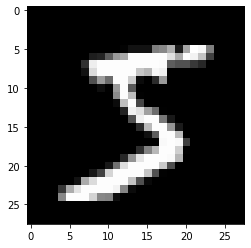

5


In [ ]:
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [ ]:
xo = x_train[0]
xn = np.zeros((28,28))

print(xn.shape)

(28, 28)


In [ ]:
for i in range(1,26):
  for j in range(1,26):
    xn[i,j] = xo[i-1,j-1] + xo[i,j-1] + xo[i-1,j] + xo[i+1,j-1] + xo[i-1,j+1] + xo[i,j] + xo[i+1,j+1] + xo[i+1,j] + xo[i,j+1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
xn

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.,  21.,  39.,  54., 162.,  24., 181.,  81., 111., 191., 156.,
        117., 118., 127.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [ ]:
xn = (xn / 9).astype(np.uint8)

In [ ]:
xn

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1,
        1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 3, 1, 0,
        1, 1, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 3, 0, 3,
        2, 1, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 0, 2, 2,
        1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 1, 2, 1, 0, 0, 0,
        0, 0, 0, 

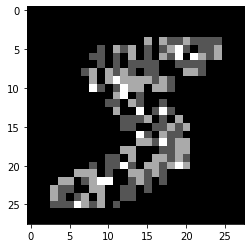

In [ ]:
plt.imshow(xn)
plt.show()

In [ ]:
for i in range(1,26):
  for j in range(1,26):
    xn[i,j] = np.abs(xo[i+1,j] - xo[i,j]) + np.abs(xo[i-1,j] - xo[i,j]) + np.abs(xo[i,j+1] - xo[i,j]) + np.abs(xo[i,j-1] - xo[i,j])
    xn[i,j] = xn[i,j] / 4

xn = xn.astype(np.uint8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in ubyte_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
xn

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  4,  4,
        31, 34, 43,  6, 41, 63, 61, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  7,  9, 23, 39, 44, 50, 54, 17,
        39,  2, 49, 38, 31, 36, 25, 14, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 19, 38, 58, 16, 39, 59, 48,  5,  5,
        32, 27, 12, 38, 40, 11, 17, 16, 16,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 12, 15, 27,  6, 24, 39, 43,  0, 50, 46,
        62, 23, 46,  4, 1

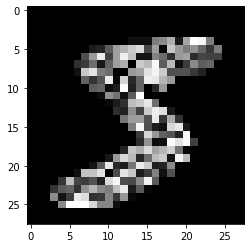

In [ ]:
plt.imshow(xn)
plt.show()

In [ ]:
img = Image.open(urlopen('https://waste4change.com/blog/wp-content/uploads/niko-photos-tGTVxeOr_Rs-unsplash-1024x683.jpg')).convert('L')

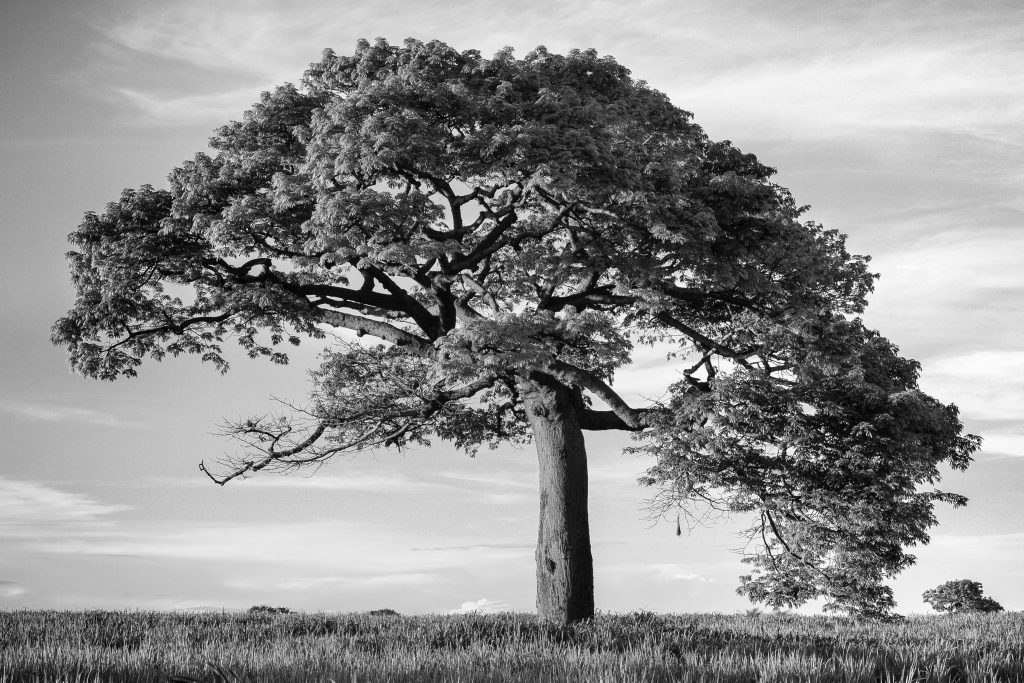

In [ ]:
img

In [ ]:
img_np = np.array(img) / 255.
img_np_n = np.zeros(img_np.shape)

In [ ]:
for i in range(1,img_np.shape[0]-2):
  for j in range(1,img_np.shape[1]-2):
    img_np_n[i,j] = np.abs(img_np[i+1,j] - img_np[i,j]) + np.abs(img_np[i-1,j] - img_np[i,j]) + np.abs(img_np[i,j+1] - img_np[i,j]) + np.abs(img_np[i,j-1] - img_np[i,j])
    #img_np_n[i,j] = img_np[i-1,j-1] + img_np[i,j-1] + img_np[i-1,j] + img_np[i+1,j-1] + img_np[i-1,j+1] + img_np[i,j] + img_np[i+1,j+1] + img_np[i+1,j] + img_np[i,j+1]
    img_np_n[i,j] = img_np_n[i,j] / 4
img_np = img_np_n
img_np_n = np.zeros(img_np.shape)

In [ ]:
print(np.amin(img_np), np.amax(img_np))

0.0 0.6127450980392157


In [ ]:
np.mean(img_np)

5.5085267728400154e-15

In [ ]:
np.var(img_np)

206.35358312353168

In [ ]:
img_np = (img_np - np.mean(img_np))/np.var(img_np)

In [ ]:
print(np.amin(img_np), np.amax(img_np))

-11.806960646412307 114.6351858753596


In [ ]:
img_np = (img_np - np.amin(img_np)) / (np.amax(img_np) - np.amin(img_np))

In [ ]:
print(np.amin(img_np), np.amax(img_np))

0.0 1.0


In [ ]:
(img_np > 0.8).astype(np.uint8)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
np.amax((img_np > 0.8).astype(np.uint8))

1

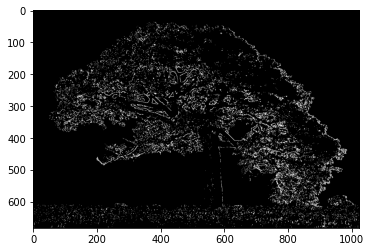

In [ ]:
plt.imshow((img_np > 0.2).astype(np.uint8))
plt.show()

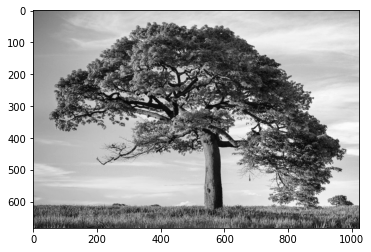

In [ ]:
plt.imshow(img_np)
plt.show()